# Magnetic levitation system

*************** Created by Pablo Borja *******************

***** Contact: pablo.borjarosales@plymouth.ac.uk *****

***** SECaM, Univerity of Plymouth, Plymouth, UK *****


## Parameters for simulation

Parameters of the plant

In [14]:
mb = 0.1; 
rho = 0.05; 
k = 0.01; 
gr = 9.8; 
r = 8; 

We choose the desired equilibrium. Remember that the set of assignable equilibria is given by

$$\mathcal{E}=\left\lbrace x\in\mathbb{R}^{3}\mid p=0, \varphi=\displaystyle\sqrt{2km_{\tt b}g_{\tt r}} 
\right\rbrace.$$

In [15]:
qd = -0.02; # Desired position. Modify if necessary.
phid = sqrt(2*mb*gr*k);

Initial conditions

Modify to simulate different initial conditions

In [16]:
q0 = 0;
p0 = 0;
phi0 = 0.1;

Initial and final time

In [17]:
t0 = 0;

tf = 20; # Modify if you want to simulate a longer or shorter period

Control gains

In [18]:
Kz = 0.08; #Gain. Modify if necessary
Kdi = 3; #Damping injection gain. The system has natural damping (in the electrical part), but you can add more (if wanted)

## System (ODE)

Below, we briefly explain how to obtain the closed-loop dynamics. Please see the PDF file "Examples" to understand this part.

================================

For implementation purposes, it's simpler to consider the three dynamics independently because only $\dot{\varphi}$ is affected by the control input. Thus, we can directly implement

$$\begin{array}{rcl}
\dot{q} &=& \frac{p}{m_{\tt b}}; \\
\dot{p} &=& -m_{\tt b}g_{\tt r} + \frac{\varphi^{2}}{2k}
\end{array}
$$

Note that

$$F_{\tt uu}=\begin{bmatrix}
0 & 1  \\ -1 & 0 \\
    \end{bmatrix}, \qquad F_{\tt au}=\begin{bmatrix}
0 & 0 
    \end{bmatrix}, \qquad F_{\tt aa} = -r.$$

The Hamiltonian's gradient is

$$\frac{\partial H(x)}{\partial x} = \begin{bmatrix} m_{\tt b}g_{\tt r} - \frac{\varphi^{2}}{2k} \\ \frac{p}{m_{\tt b}} \\ \frac{1}{k}\varphi(\rho - q) \end{bmatrix}.$$

Additionally,

$$\sigma = 1, \quad \Upsilon = \begin{bmatrix} -1 \\ 0 \end{bmatrix}, \quad \beta_{\tt u}(x_{\tt u}) = \begin{bmatrix}
     m_{\tt b}g_{\tt r} \\
     \frac{p}{m_{\tt b}}   \end{bmatrix}, \quad \beta_{\tt 
a}(x_{\tt a}) = \frac{1}{2k}\varphi^{2}, \quad z(x) = q+\varphi.$$

Hence, for the suggested $\Psi(z(x))$, we obtain

$$\frac{\partial \Psi(z(x))}{\partial x} = \begin{bmatrix} K_{\tt z}(q+\varphi-q_{\tt d}-\varphi_{\tt d})-m_{\tt b}g_{\tt r} \\ 0 \\ K_{\tt z}(q+\varphi-q_{\tt d}-\varphi_{\tt d})-m_{\tt b}g_{\tt r}\end{bmatrix}.$$

Therefore,

$$\frac{\partial H_{\tt d}(x)}{\partial x} = \begin{bmatrix} K_{\tt z}(q+\varphi-q_{\tt d}-\varphi_{\tt d})-m_{\tt b}g_{\tt r} \\ 0 \\ K_{\tt z}(q+\varphi-q_{\tt d}-\varphi_{\tt d})-m_{\tt b}g_{\tt r}\end{bmatrix} + \begin{bmatrix}
     m_{\tt b}g_{\tt r} \\
     \frac{p}{m_{\tt b}} \\  \frac{1}{2k}\varphi^{2} \end{bmatrix}$$

Hence, the control law reduces to

$$\begin{array}{rcl}
u &=& -\sigma\Upsilon^{\top}F_{\tt uu}^{\top}(x)\frac{\partial H_{\tt d}(x)}{\partial x_{\tt u}}+F_{\tt aa}(x)\left(\frac{\partial H_{\tt d}(x)}{\partial x_{\tt
a}}-\frac{\partial H(x)}{\partial x_{\tt a}}  \right)-K_{\tt di}\frac{\partial H_{\tt d}(x)}{\partial x_{\tt a}}- F_{\tt au}(x)\frac{\partial H(x)}{\partial x_{\tt u}}\\
&=& -\frac{p}{m_{\tt b}}-(r+K_{\tt di})\left(K_{\tt z}(q+\varphi-q_{\tt d}-\varphi_{\tt d})-m_{\tt b}g_{\tt r}+ \frac{1}{2k}\varphi^{2}\right)+\frac{r}{k}\varphi(\rho - q).
\end{array}
$$

To obtain the closed-loop dynamics, we substitute the control law $u$ obtained above into

$$\dot{\varphi} = -\frac{r}{k}\varphi(\rho - q)+u.$$

In [38]:
(q,p,phi,t) = var('q,p,phi,t')

u = -p/mb-(r+Kdi)*(Kz*(q+phi-qd-phid)-mb*gr+(phi**2)/(2*k))+r*phi*(rho-q)/k

# Dynamics

dq = p/mb;

dp = -mb*gr+(phi**2)/(2*k);

dphi = -r*phi*(rho-q)/k+u;

dydt = [dq, dp, dphi]

sol = desolve_system_rk4(dydt, [q,p,phi], [t0,q0,p0,phi0],t,end_points=tf,step = .005)


## Plots

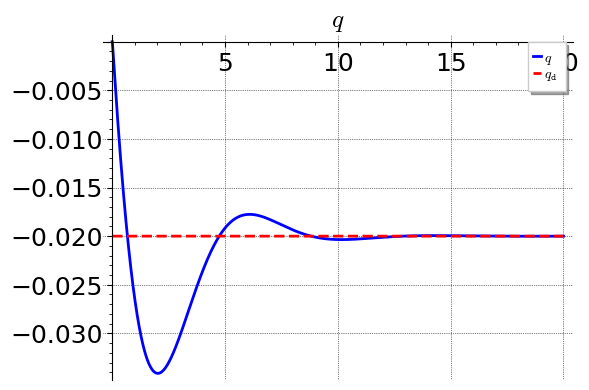

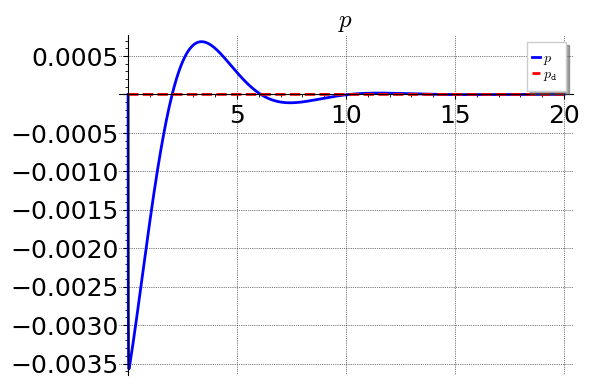

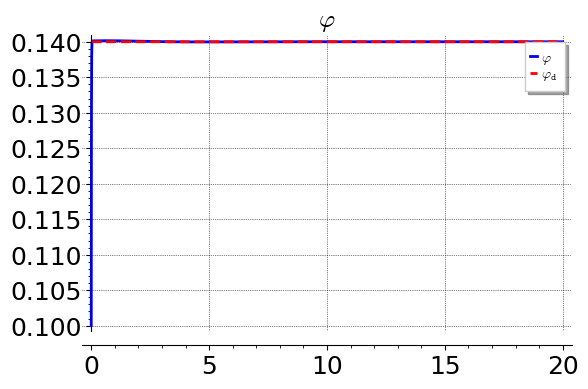

In [39]:
P = matrix(sol)

p_q = [(P[i, 0], P[i, 1]) for i in range(P.nrows())]
p_qd = [(P[i, 0], qd) for i in range(P.nrows())]

p_p = [(P[i, 0], P[i, 2]) for i in range(P.nrows())]
p_pd = [(P[i, 0], 0) for i in range(P.nrows())]

p_phi = [(P[i, 0], P[i, 3]) for i in range(P.nrows())]
p_phid = [(P[i, 0], phid) for i in range(P.nrows())]

plot_q = list_plot(p_q,plotjoined=True, title='$q$',fontsize=18,thickness=2,legend_label='$q$',gridlines='normal')
plot_qd = list_plot(p_qd,plotjoined=True, legend_label='$q_{\\tt d}$',fontsize=18,thickness=2,linestyle="--",color='red')

combined_q = plot_q + plot_qd
combined_q.show()

plot_p = list_plot(p_p,plotjoined=True, title='$p$',fontsize=18,thickness=2,legend_label='$p$',gridlines='normal')
plot_pd = list_plot(p_pd,plotjoined=True, legend_label='$p_{\\tt d}$',fontsize=18,thickness=2,linestyle="--",color='red')

combined_p = plot_p + plot_pd
combined_p.show()

plot_phi = list_plot(p_phi,plotjoined=True, title='$\\varphi$',fontsize=18,thickness=2,legend_label='$\\varphi$',gridlines='normal')
plot_phid = list_plot(p_phid,plotjoined=True, legend_label='$\\varphi_{\\tt d}$',fontsize=18,thickness=2,linestyle="--",color='red')

combined_phi = plot_phi + plot_phid
combined_phi.show()


## Alternative solver

This solver seems faster

In [50]:
T = ode_solver()

import sage.plot.plot

dy = lambda t,y: [y[1]/mb, -mb*gr+(y[2]**2)/(2*k), -r*y[2]*(rho-y[0])/k-y[1]/mb-(r+Kdi)*(Kz*(y[0]+y[2]-qd-phid)-mb*gr+(y[2]**2)/(2*k))+r*y[2]*(rho-y[0])/k]
T.function = dy
T.y_0 = [q0,p0,phi0]
T.algorithm = "rk8pd"
T.scale_abs = [1e-4, 1e-4, 1e-5]
T.error_rel = 1e-4
T.ode_solve(t_span=[t0,tf], num_points=1000)

There are (at least) two ways to plot the result.

The first option is given below

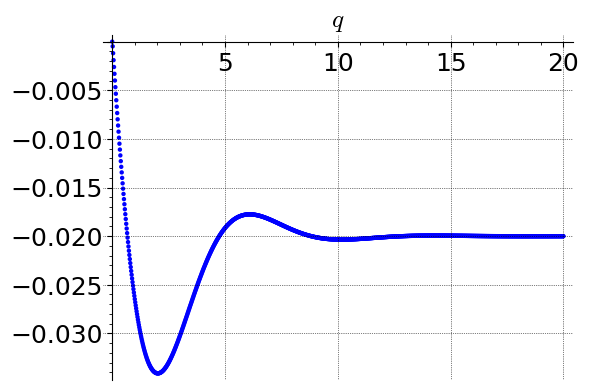

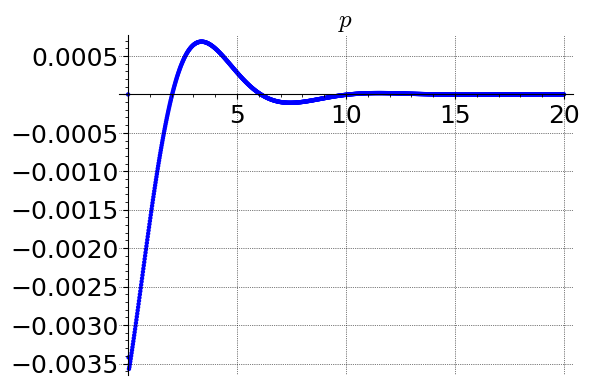

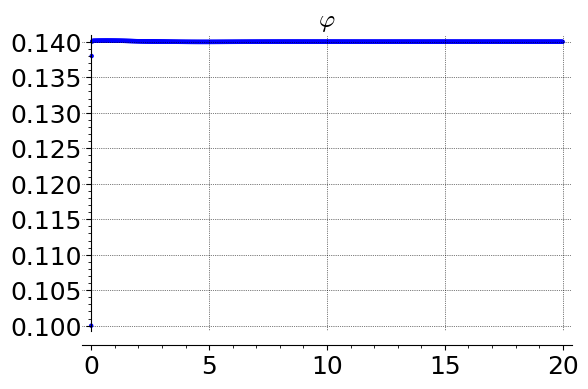

In [63]:
T.plot_solution(0,title='$q$',fontsize=18,gridlines='normal')
T.plot_solution(1,title='$p$',fontsize=18,gridlines='normal')
T.plot_solution(2,title='$\\varphi$',fontsize=18,gridlines='normal')
    

We provide another alternative below

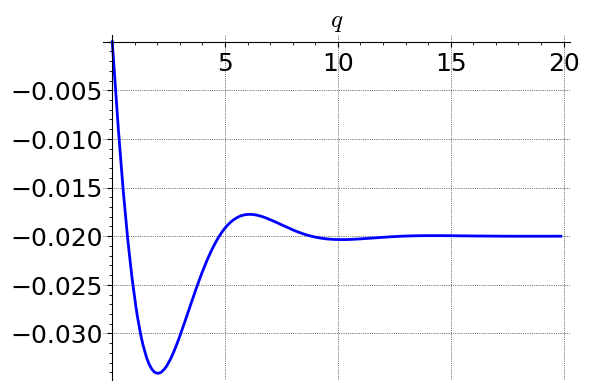

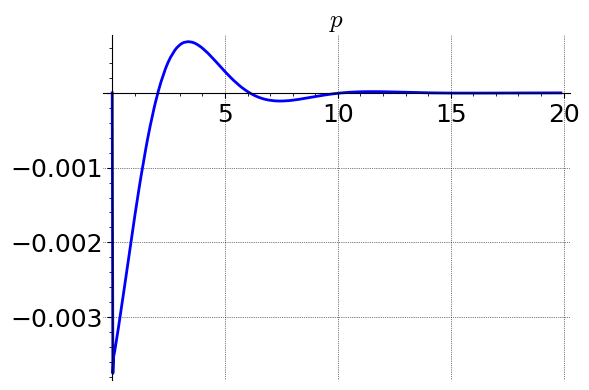

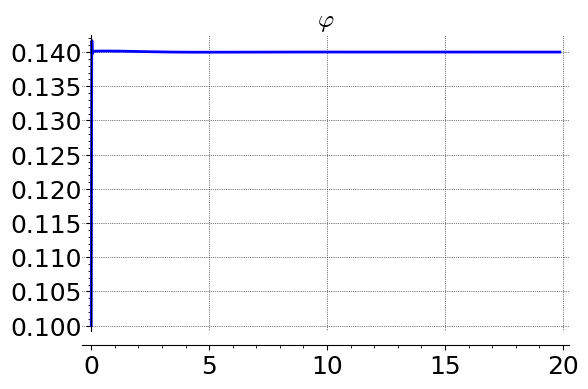

In [66]:
f = T.interpolate_solution(0)
plot(f,t0,tf,title='$q$',fontsize=18,thickness=2,gridlines='normal').show()                                                       

f = T.interpolate_solution(1)
plot(f,t0,tf,title='$p$',fontsize=18,thickness=2,gridlines='normal').show()                                                       

f = T.interpolate_solution(2)
plot(f,t0,tf,title='$\\varphi$',fontsize=18,thickness=2,gridlines='normal').show()